In [1]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from dataset import MonuSegDataSet
from Sampler import DinoPoweredSampler
import matplotlib.pyplot as plt
from auxilary.utils import *


In [2]:
config = readConfig("config.sys")

In [3]:
trainPaths = config["trainDataset"]
sampleTrainImages = load_images(trainPaths)
dino_model = load_sampling_model(modelType="small")
train_dataset = MonuSegDataSet(config["trainDataset"])

loading Images from path: Dataset/trainNormal/


100%|██████████| 85536/85536 [01:16<00:00, 1111.54it/s]
Using cache found in /home/blue/.cache/torch/hub/facebookresearch_dinov2_main
xFormers not available
xFormers not available


Loading Features
Applying t-SNE
Directory Outputs/Plots/ already exists
Applying DBSCAN
Unique clusters: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
Directory Outputs/Plots/ already exists
Sampling Initialization Complete


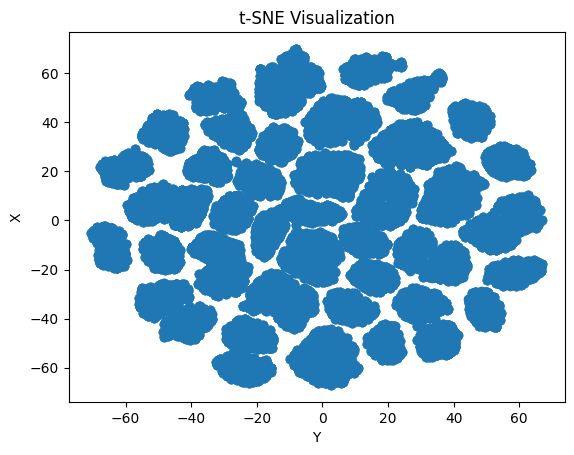

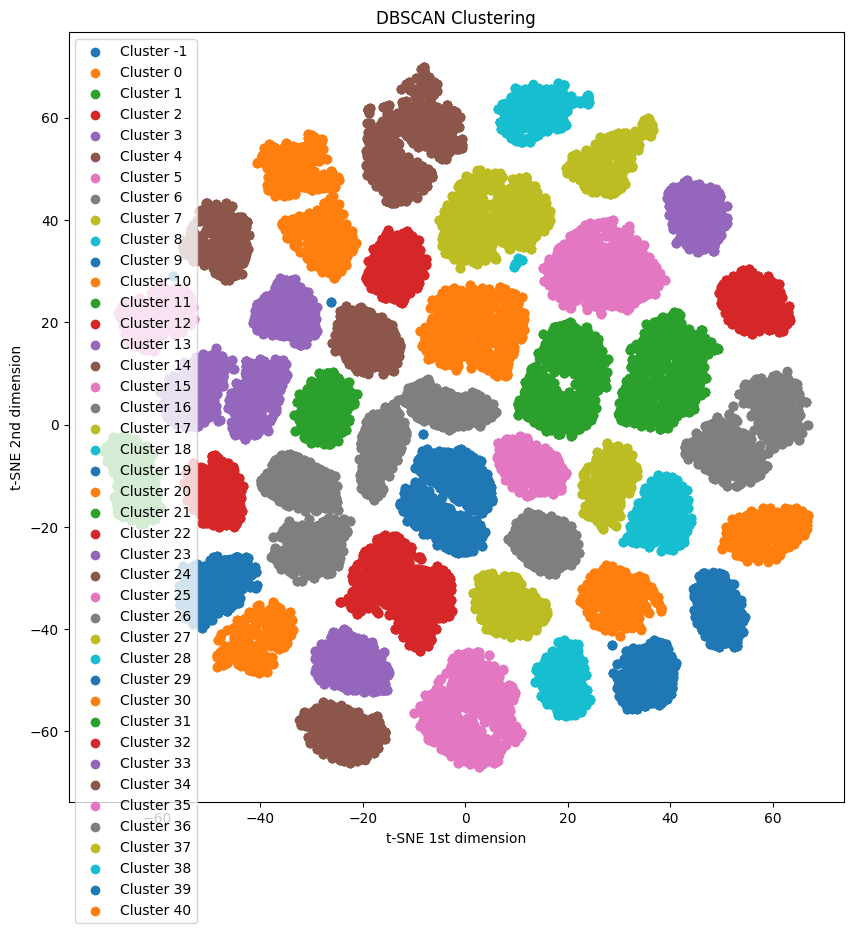

In [4]:
sampler = DinoPoweredSampler(images=sampleTrainImages, dino_model=dino_model, config=config)
train_data = DataLoader(train_dataset,batch_size=config["batch_size"], sampler=sampler)

In [ ]:
# Test DataLoader
batch_count = 0
for i, batch in enumerate(train_data):
    batch_count += 1
    print(f"Batch {i+1} of size {len(batch)}")
    # For visualization, let's assume each element in the batch is an image
    for j, image in enumerate(batch):
        plt.subplot(4, 4, j+1)
        plt.imshow(image)
    plt.show()

print(f"Total batches: {batch_count}")

In [4]:
# Fetch one batch of data
for batch_idx, (inputs, targets) in enumerate(train_data):
    if batch_idx == 0:  # We'll just visualize the first batch in this example
        print(f"Sampled indices for the first batch: {indices}")
        break



Making Batches


100%|██████████| 2673/2673 [00:23<00:00, 112.97it/s]


In [6]:
inputs = inputs.cpu()
targets = targets.cpu()
print(inputs.shape)

torch.Size([16, 3, 256, 256])


In [7]:
batch_size = inputs.shape[0]

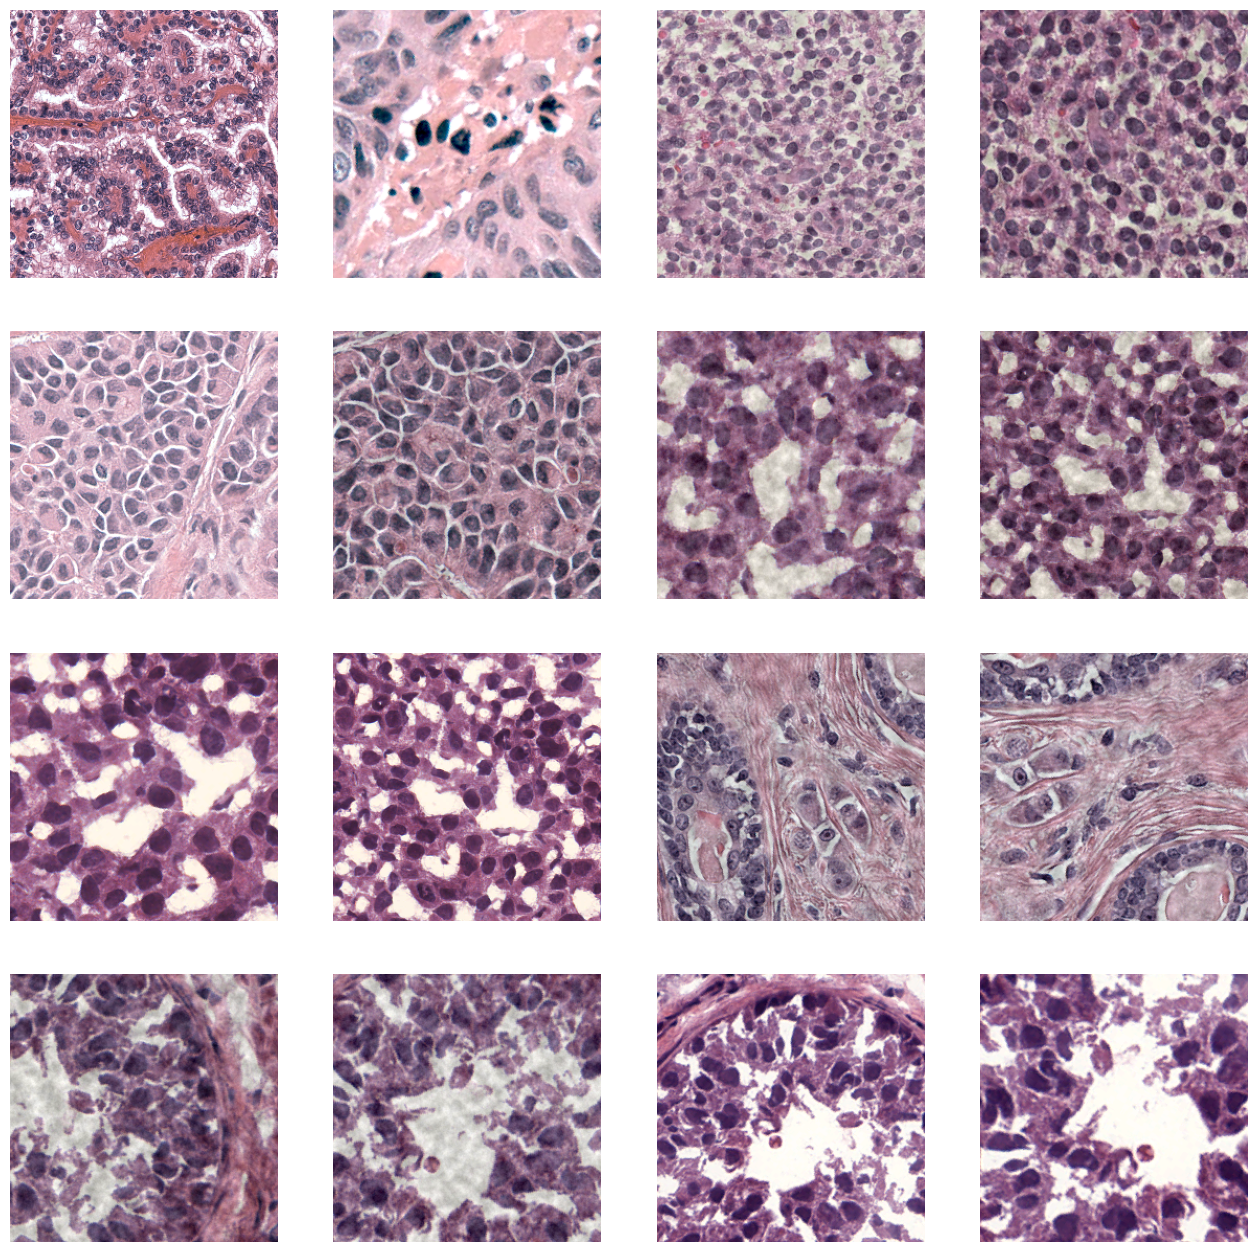

In [11]:
# Create a grid for visualization
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

for i in range(batch_size):
    row = i // 4
    col = i % 4
    
    # Assuming inputs are in the format [Batch, Channels, Height, Width]
    image = inputs[i].permute(1, 2, 0)  # Switch to [Height, Width, Channels] if needed
    target = np.argmax(targets[i], axis=0)
    
    # Normalize the image to [0, 1] if it's not
    image = (image - image.min()) / (image.max() - image.min())
    
    axs[row, col].imshow(image.squeeze(), cmap='gray')  # Display the image
    #axs[row, col].imshow(target.squeeze(), alpha=0.5, cmap='jet')  # Overlay the target
    axs[row, col].axis('off')

plt.show()

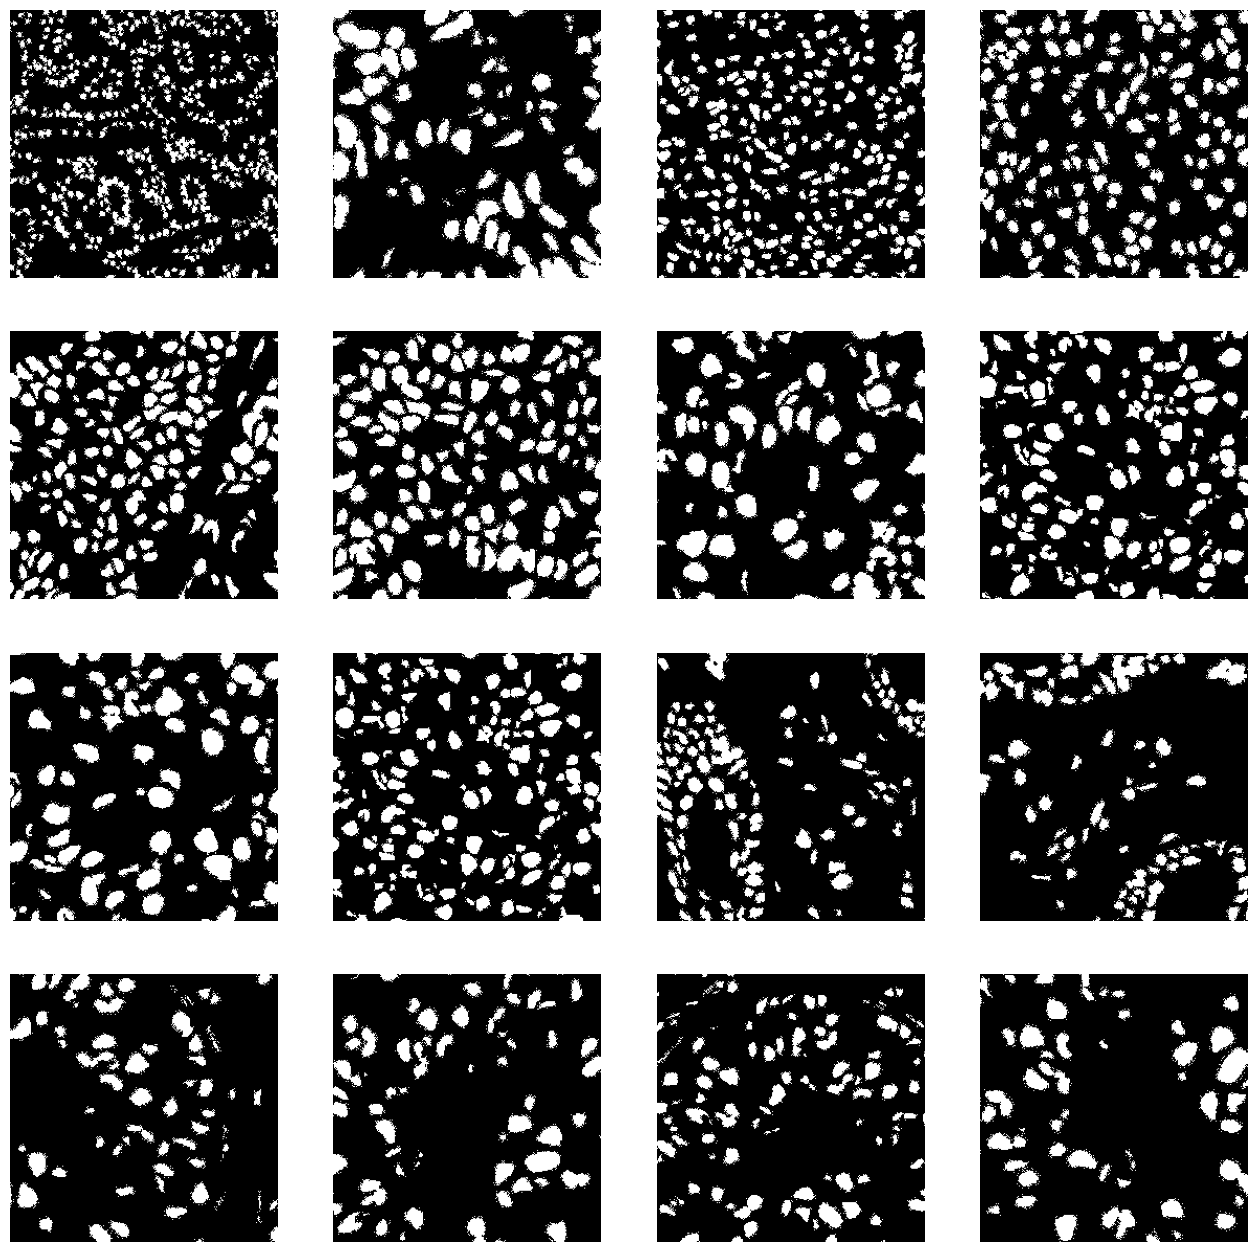

In [13]:
# Create a grid for visualization
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

for i in range(batch_size):
    row = i // 4
    col = i % 4
    
    # Assuming inputs are in the format [Batch, Channels, Height, Width]
    image = inputs[i].permute(1, 2, 0)  # Switch to [Height, Width, Channels] if needed
    target = np.argmax(targets[i], axis=0)
    
    # Normalize the image to [0, 1] if it's not
    image = (image - image.min()) / (image.max() - image.min())
    
    #axs[row, col].imshow(image.squeeze(), cmap='gray')  # Display the image
    axs[row, col].imshow(target.squeeze(), cmap='gray')  # Overlay the target
    axs[row, col].axis('off')

plt.show()

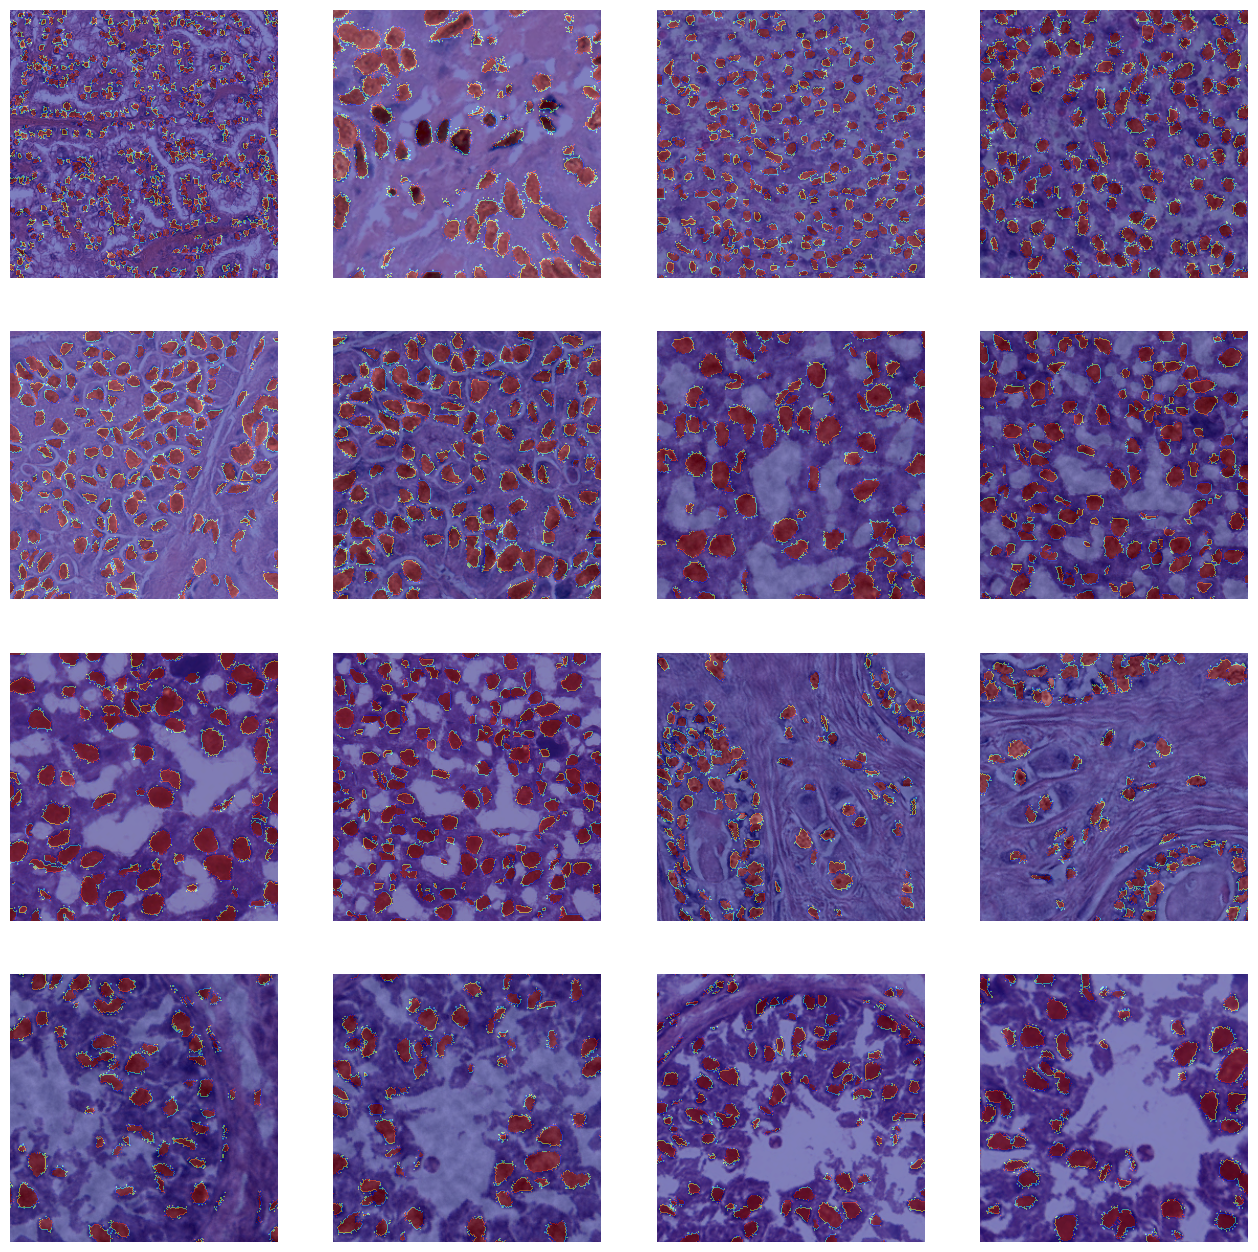

In [14]:
# Create a grid for visualization
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

for i in range(batch_size):
    row = i // 4
    col = i % 4
    
    # Assuming inputs are in the format [Batch, Channels, Height, Width]
    image = inputs[i].permute(1, 2, 0)  # Switch to [Height, Width, Channels] if needed
    target = np.argmax(targets[i], axis=0)
    
    # Normalize the image to [0, 1] if it's not
    image = (image - image.min()) / (image.max() - image.min())
    
    axs[row, col].imshow(image.squeeze(), cmap='gray')  # Display the image
    axs[row, col].imshow(target.squeeze(), alpha=0.5, cmap='jet')  # Overlay the target
    axs[row, col].axis('off')

plt.show()

# Check Dice Performance

In [33]:
from auxilary.utils import *
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [23]:
image1 = "Dataset/testNormal/0_label.png"
image2 = "Outputs/experiment_09-12_10.37.19/testResults/0_pred_color.png"

In [24]:
img1 = cv2.imread(image1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(image2, cv2.IMREAD_GRAYSCALE)
img1 = img1[0:800, 0:800]
img2 = img2[0:800, 0:800]

In [25]:
print(dice_coef(img1, img2))

0.0028350881788509912


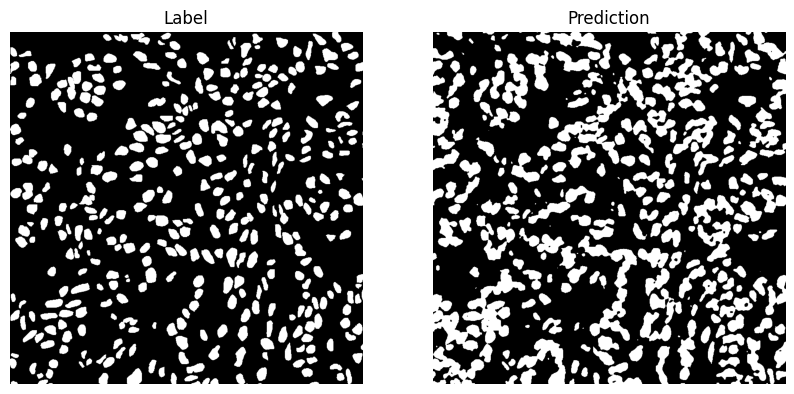

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# Display img1
axes[0].imshow(img1, cmap='gray')
axes[0].set_title('Label')
axes[0].axis('off')

# Display img2
axes[1].imshow(img2, cmap='gray')
axes[1].set_title('Prediction')
axes[1].axis('off')

plt.show()

In [34]:
def calc_confusion_matrix(label, pred,num_classes):
    category = num_classes*label + pred
    confusion_matrix = np.zeros((num_classes,num_classes))
    for i in range(category.shape[0]):
        oneD_array = np.reshape(category[i],(-1))
        bincount = np.bincount(oneD_array,minlength=num_classes**2)
        confusion_matrix += np.reshape(bincount,(num_classes,num_classes))
   
    return confusion_matrix

In [37]:
cm = confusion_matrix(img1, img2)
print(cm)

ValueError: multilabel-indicator is not supported

In [ ]:
print